###### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 3: Data Visualization

### 100 points [6% of your final grade]
### Due: October 2 by 11:59pm

*Goals of this homework:* In this homework, you will create a data visualization based on an exploration of datasets we provide. Your visualization should capture Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

*Special notes:* Be sure to read over this entire notebook before starting. Before submitting, you are welcome to solicit feedback on your data visualization using Piazza. 

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw3.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw3.ipynb`. Submit this notebook via Canvas (looking for homework 3 under the assignment section).  Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. **If you inserted any images to the notebook, do upload them as well.**

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after October 5 at 11:59pm.

### Collaboration declarations:

You should add in all of your collaboration declarations here. 

* https://matplotlib.org/tutorials/intermediate/legend_guide.html
* https://markhneedham.com/blog/2018/12/21/pandas-plot-x-axis-index/
* https://www.geeksforgeeks.org/matplotlib-axes-axes-set_xticklabels-in-python/
* https://stackoverflow.com/questions/9103166/multiple-axis-in-matplotlib-with-different-scales
* https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
* https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
* https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html

*Recall our homework collaboration policy: Your homework is yours alone and you are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. If you do have a chat with another student about a homework problem, you must inform us by writing a note on your homework submission (e.g., Bob pointed me to the relevant section for problem 3). The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.*

## The role of data visualization in a pandemic
COVID-19 pandemic has drastically changed the world and our daily life in many aspects. At this challenging time, data visualization a powerful way for us to identify the development, impact, and even mitigation of the pandemic. Data visualization is also one of the best ways to raise public awareness, drive policymaking, and so on.   

### Assignment goal
Your goal is to (i) identify an interesting story or insight from the COVID-19 data we provide (with or without auxiliary data); and (ii) carefully design a data visualization that communicates this story. You may assume that your audience is the general public.
 
### Grading Breakdown  
10 points: Interestingness and clarity of question you ask  
20 points: Appropriateness of data, scale, and other viz design choices  
15 points: Legends, context, and titles of your viz  
25 points: Overall quality of your viz: in the extreme, every pixel serves a purpose  
15 points: Design rationale (writeup)  
15 points: Pros and cons of your design (writeup)  

## Ingredients in your basket  
Let's take a look at what ingredients you have in hand before beginning. Your assignment package shipped with two data folders:
* COVID-19_Main - which contains [JHU](https://coronavirus.jhu.edu/)'s time series data of confirmed cases / death / recovery by country around the world and the time series data of confirmed cases / death by U.S. county. **You must utilize at least one file from this folder for the assignment.**
* COVID-19_Auxiliary - which contains some sample auxiliary data from resources/databases listed below.   
    * World Bank Open Data: https://data.worldbank.org/indicator?tab=all  
    * Yahoo Financial: https://finance.yahoo.com/quote/ZM/history (You can replace ZM with other stock symbol)  
    * U.S. Bureau of Labor Statistics: https://www.bls.gov/data/  
    * U.S. Energy Information Administration: https://www.eia.gov/petroleum/data.php  
    * U.S. Census Data: https://www.census.gov/data/tables.html  
    **Using auxiliary data is optional for this assignment. You may use any amount of auxiliary data from 1) the COVID-19_Auxiliary folder; 2) resources/databases listed above; and/or 3) any publicly accessible datasets/resources that you deemed useful.** 

## Have a research question in mind
You may feel that there's an overwhelming amount of ingredients available in the world! Having a research question in mind can help you make better selections and decisions for the visualization. Under the ["Critical Trend" section of JHU's Coronavirus Resource Center](https://coronavirus.jhu.edu/data), you can find many examples of research questions answered by visualized data. **Your research question must be different from JHU's.**   
Type your research question below. You may revise it later for better clarity as you progress.

## My research question is: 
Did COVID-19 cases and deaths at Brazos County increase due to Texas A&M reopening for the fall semester. 

## Ideas: 
* COVID-19 Mortality Rate per Country (already solved)
* COVID-19 Mortality Rate per State (already solved)
* Total Deaths per 100,000 population for each state/country (already solved)


## Prepare data
With your research question in mind, you need to identify appropriate data for the visualization that could answer your research question.  

For questions like [Have states flattened the curve?](https://coronavirus.jhu.edu/data/new-cases-50-states), data in the COVID-19_Main folder is sufficient enough.
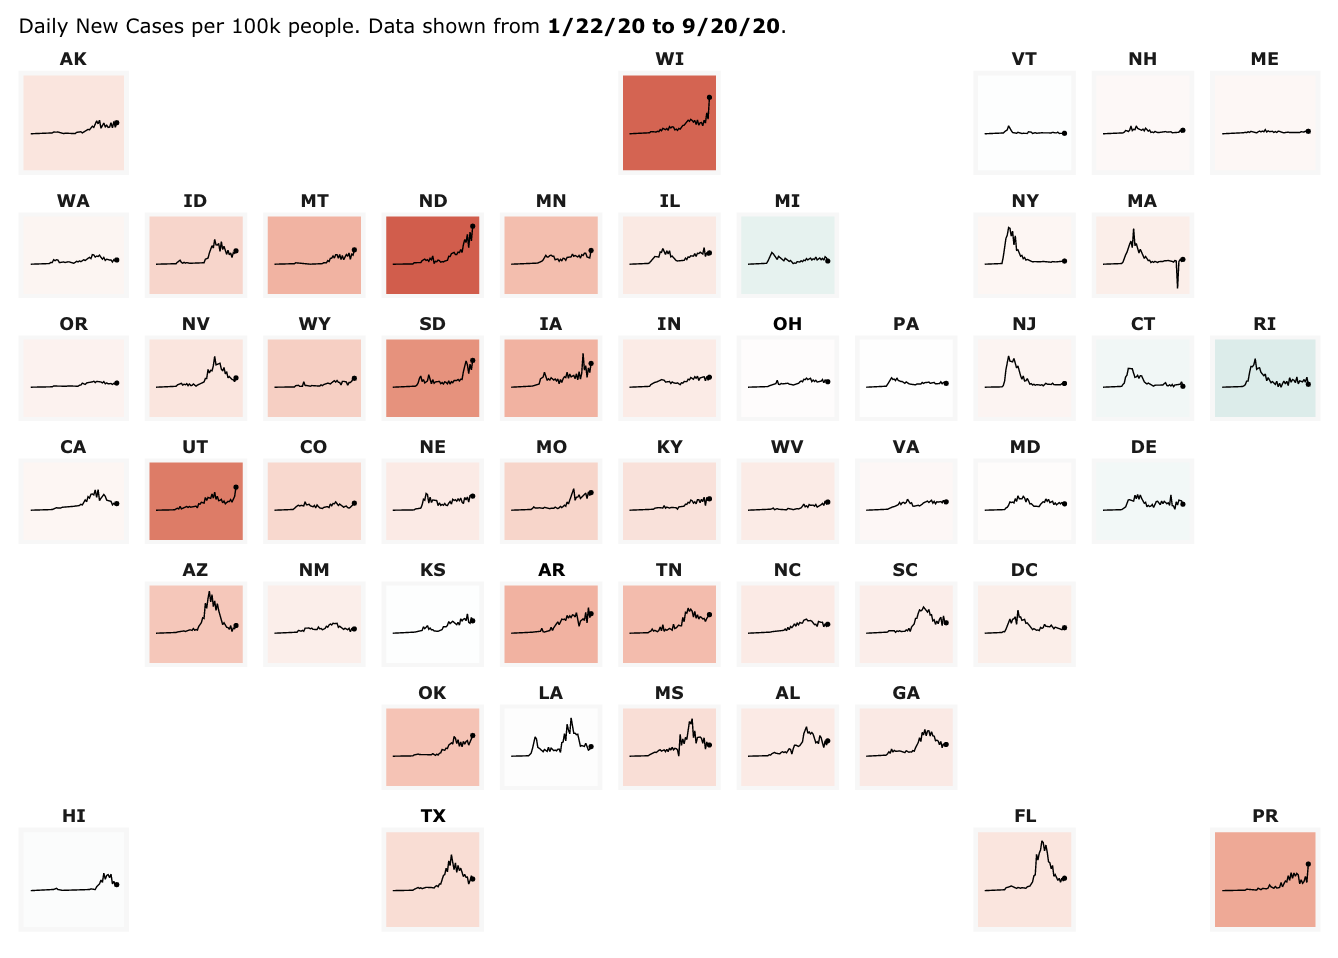
  
For questions that investigate impact, correlation, etc., you may need some auxiliary data. The following graph is plotted with a combination of COVID-19 death data from JHU and census data from world bank.  
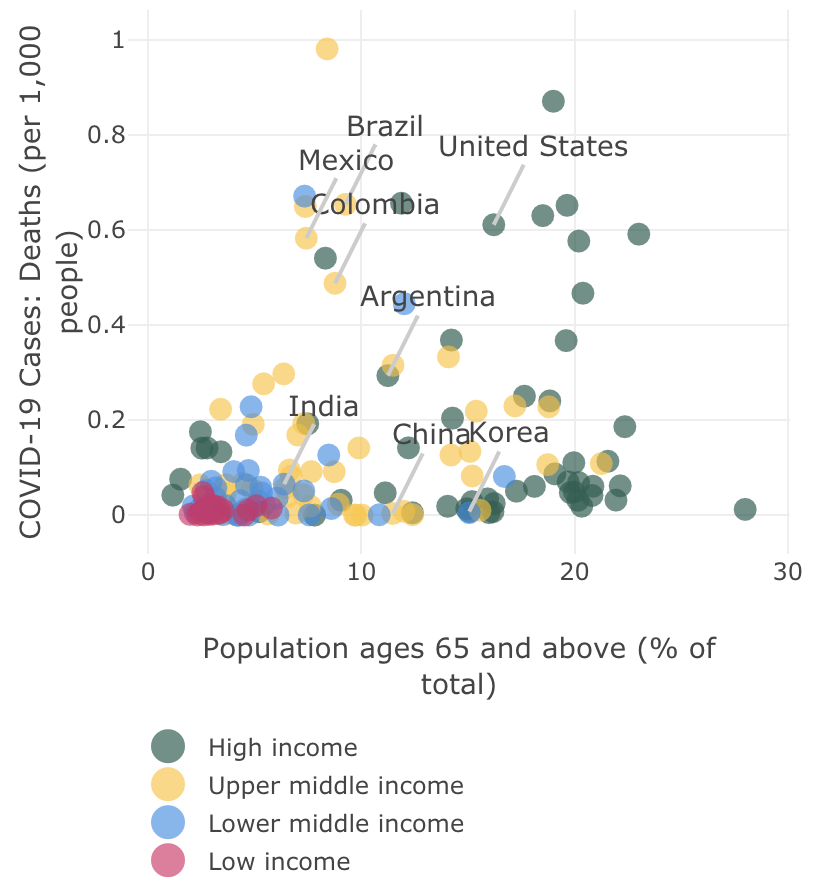

For questions like [How did events unfold in Hubei, China?](https://coronavirus.jhu.edu/data/hubei-timeline), you may need to find some event information from external resources such as news agencies, Wikipedia, etc.
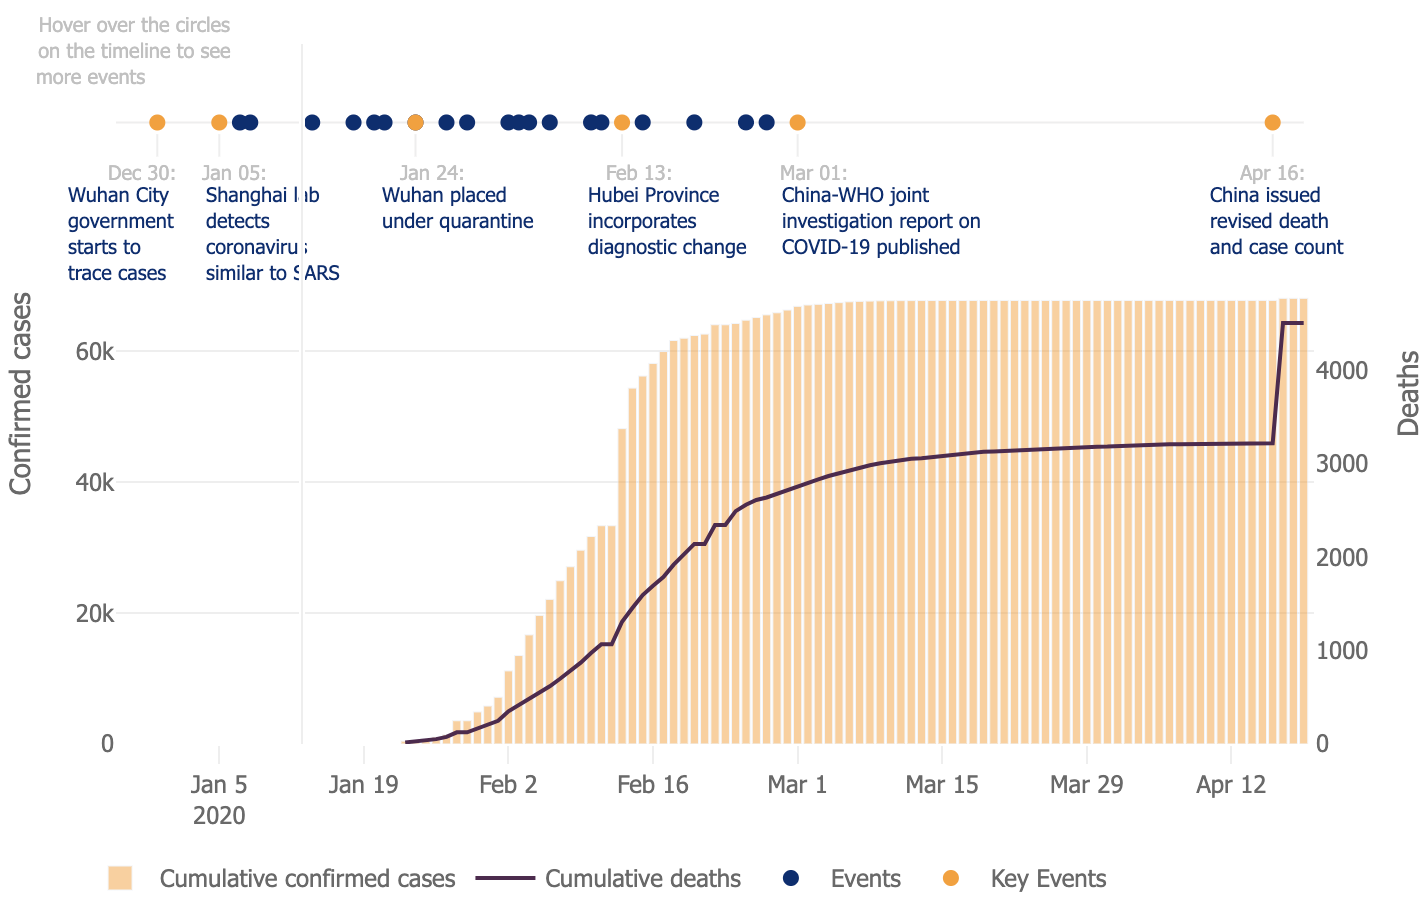

Keep in mind:
* You must utilize at least one file from the COVID-19_Main folder.
* Using auxiliary data is optional for this assignment. You may use any amount of auxiliary data from 1) the COVID-19_Auxiliary folder; 2) resources/databases listed above; and/or 3) any publicly accessible datasets/resources that you deemed useful.
* Your assignment will be graded by the appropriateness of data, scale, and other viz design choices.  

**Also, you may clean, manipulate, and transform the data as you like.**

In [109]:
# read in & prepare data for visualization
### your code here ###
import urllib
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

death_COVID = pd.read_csv(r'C:\Users\Khoa\Documents\_School\CSCE_320\hw3\COVID-19_Main\time_series_covid19_deaths_US.csv', encoding='latin1')
case_COVID = pd.read_csv(r'C:\Users\Khoa\Documents\_School\CSCE_320\hw3\COVID-19_Main\time_series_covid19_confirmed_US.csv', encoding='latin1')
# case_COVID.head()
# death_COVID.head()


for row in death_COVID.index: # looping thru all the durations
    if death_COVID.loc[row, "Combined_Key"] == "Brazos, Texas, US":
        death_brazos = death_COVID.loc[row, :]

for row in case_COVID.index: # looping thru all the durations
    if case_COVID.loc[row, "Combined_Key"] == "Brazos, Texas, US":
        case_brazos = case_COVID.loc[row, :]

case_brazos_cleaned = case_brazos[50:]
case_brazos_cleaned = case_brazos_cleaned.astype(int)

death_brazos_cleaned = death_brazos[51:]
death_brazos_cleaned = death_brazos_cleaned.astype(int)
death_brazos_cleaned


3/1/20      0
3/2/20      0
3/3/20      0
3/4/20      0
3/5/20      0
           ..
9/15/20    60
9/16/20    61
9/17/20    61
9/18/20    61
9/19/20    62
Name: 2718, Length: 203, dtype: int32

**List of datasets you used**  
For data shipped with the assignment package, you just need to list file name(s).   
For the others, list the link to the data download page together with a short description for each of them.  
  
1. time_series_covid19_confirmed_US
2. time_series_covid19_deaths_US

## Visualize now!
Ultimately, you should produce a single image that effectively communicates the question you ask of the data. You must use a Python visualization toolkit as your key tool, but you are welcome to augment with other tools if you like (e.g., Photoshop, MS Paint, GIMP). For Python viz tools, you may use matplotlib, plotly, seaborn, geoplotlib, bokeh, networkx, or whatever else you can find.  

## Finally, a brief explanation describing your design. (a few paragraphs, 1/2 page or so).  
Your explanation should justify the design choices you have made. Why did you choose the particular visualization type? What motivated your choice of size, color, and scale? Why are they appropriate for what you are trying to communicate? Additionally, your explanation should document what you are trying to communicate, the benefits of your choice of visualization, as well as any downsides to your viz (e.g., are certain connections downplayed due to your choices?). 

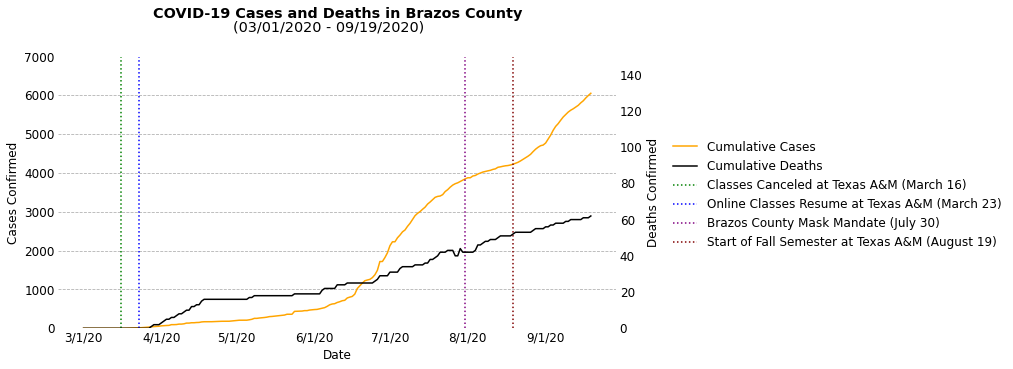

In [194]:
# read in & prepare data for visualization
### your code here ###
x = death_brazos_cleaned.index
y1 = death_brazos_cleaned.values
y2 = case_brazos_cleaned.values
# print(x)
# print(y1)
# print(y2)

fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches(10,5)
plt.rcParams.update({'font.size': 12})

p1 = case_brazos_cleaned.plot.line(color='orange', ax = ax, label = "Cumulative Cases")
p2 = death_brazos_cleaned.plot.line(color='black', ax = ax2, label = 'Cumulative Deaths')


ax.set_ylim(0, 7000)
ax2.set_ylim(0, 150)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax.grid(which='major', axis='y', linestyle='--')
# ax2.grid(which='major', axis='y', linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('Cases Confirmed')
ax.tick_params(axis='y')
plt.ylabel('Deaths Confirmed')
ax2.tick_params(axis='y')

# Done manually could be done with a function. This was easier but less scalable
plt.xticks([0, 31, 61, 92, 122, 153, 184], [x[0], x[31], x[61], x[92], x[122], x[153], x[184]])
plt.title('COVID-19 Cases and Deaths in Brazos County\n\n', fontweight ="bold")
plt.suptitle('(03/01/2020 - 09/19/2020)')

# timeline
ylim = ax.get_ylim()
plt.vlines(15, ylim[0], ylim[1], color = 'green', linestyles = 'dotted', label = "Classes Canceled at Texas A&M (March 16)")
plt.vlines(22, ylim[0], ylim[1], color = 'blue', linestyles = 'dotted', label = "Online Classes Resume at Texas A&M (March 23)")
plt.vlines(152, ylim[0], ylim[1], color = 'purple', linestyles = 'dotted', label = "Brazos County Mask Mandate (July 30)")
plt.vlines(171, ylim[0], ylim[1], color = 'maroon', linestyles = 'dotted', label = "Start of Fall Semester at Texas A&M (August 19)")

plt.tick_params(axis='both', which='both', length=0) 
ax.tick_params(axis='both', which='both', length=0) 
plt.legend(bbox_to_anchor=(1.083, 0.66), frameon=False, loc = 'upper left')
ax.legend(bbox_to_anchor=(1.083, 0.73), frameon=False, loc = 'upper left')

plt.show()


If you utilized any post-editing tools (e.g., Photoshop, MS Paint, GIMP), insert your finalized image in this cell. Also, don't forget to upload the image file when submitting this notebook on Canvas.

Version 1: (used MS Paint for the timeline)
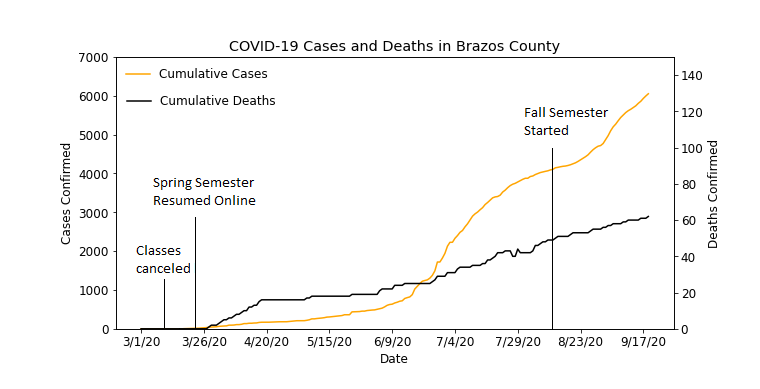

Version 2: (used MS Paint for the Note)
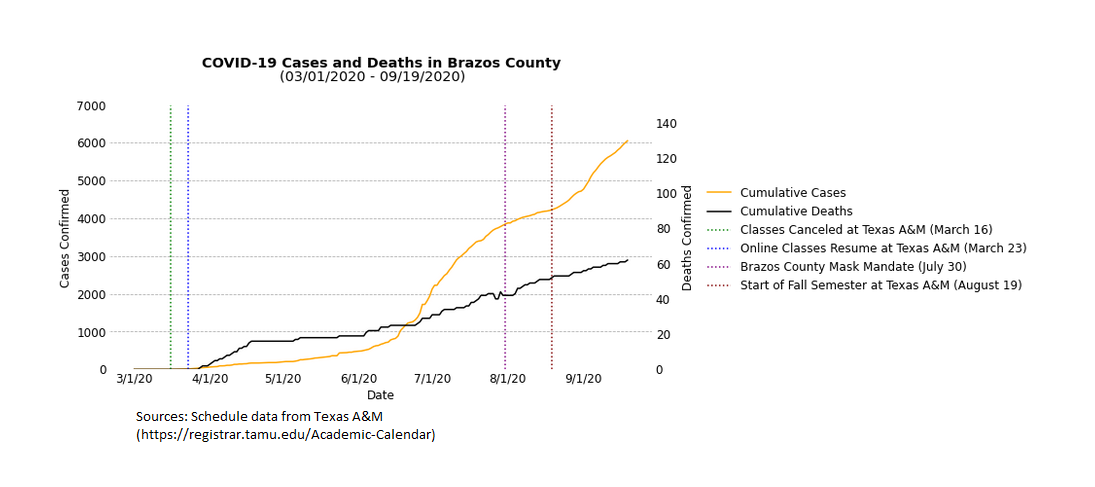

BACKUP LINK: https://imgur.com/a/tB78TVB

The question that was asked is how did the reopening of Texas A&M campus, affect the cumulative cases and deaths of Brazos County. The design choices were similar to one of the examples. First I had to visualize the cases and deaths due to COVID-19 of just Brazos. In order to do this I used the csv files from the folder. Specifically, I used time_series_covid19_confirmed_US.csv and time_series_covid19_deaths_US.csv for the data. I used two line graphs, one for cases and the other for deaths. This was done to show the change over time.

In order to distinguish the two line graphs, I color-coded the graphs. The colors chosen, orange and black, were chosen semi-arbitrary. The colors were chosen for clarity first. Secondarily, the colors were chosen since those are “fall” colors to represent the start of the fall semester. The maroon color was also chosen because that is  The x scale and y scale were chosen to fit all the data points. The date starts on March 1, which was around the time of the COVID-19 outbreak in the United States, and when college started to shut down. In terms of size, it was also mostly done by eyeballing what sizes looked the best. Some ground rules were that I knew that the width had to be at least double the height for clarity. 

This line graph is appropriate at trying to convince the messages that I am trying to communicate to the user. The main message is that since fall semester started, confirmed cases at Brazos are increasing at a faster rate than before. Also I am also communicating that COVID-19 death rate at Brazos has not been increasing at a faster rate. The mask mandate seems to slow This can be shown by glancing at the graph by seeing a steeper slope to the right of the vertical line representing the start of school compared to the left. 

The downsides to this graph is the fact that this could simply be correlation, not causation. Since COVID-19 case will grow exponentially, there is no definite proof that students coming into campus is the cause of the increase. However, due to some connections, I know that some fellow Aggies do not respect the COVID-19 by not wearing masks, not social distancing, and gather at large events (such as parties). Another downside is that the timeline aspect of the figure was done manually, not done by Python. This is because I could not find a way to timeline it properly. If I had to redo this assignment, this would be the aspect I would like to improve. 
